In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Sales_LinReg.csv")

In [7]:
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [8]:

import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split



import seaborn as sns

import pickle

import warnings
warnings.filterwarnings("ignore")

In [9]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [10]:
data.shape

(305, 6)

In [11]:
data.isna().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [13]:
data["Republic"] = data["Republic"].fillna(data["Republic"].mean())

data["NDTV"] = data["NDTV"].fillna(data["NDTV"].mean())

data["TV9"] = data["TV9"].fillna(data["TV9"].mean())

data["AajTak"] = data["AajTak"].fillna(data["AajTak"].mean())

In [14]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  305 non-null    float64
 1   NDTV      305 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       305 non-null    float64
 4   AajTak    305 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [16]:
data.shape

(305, 6)

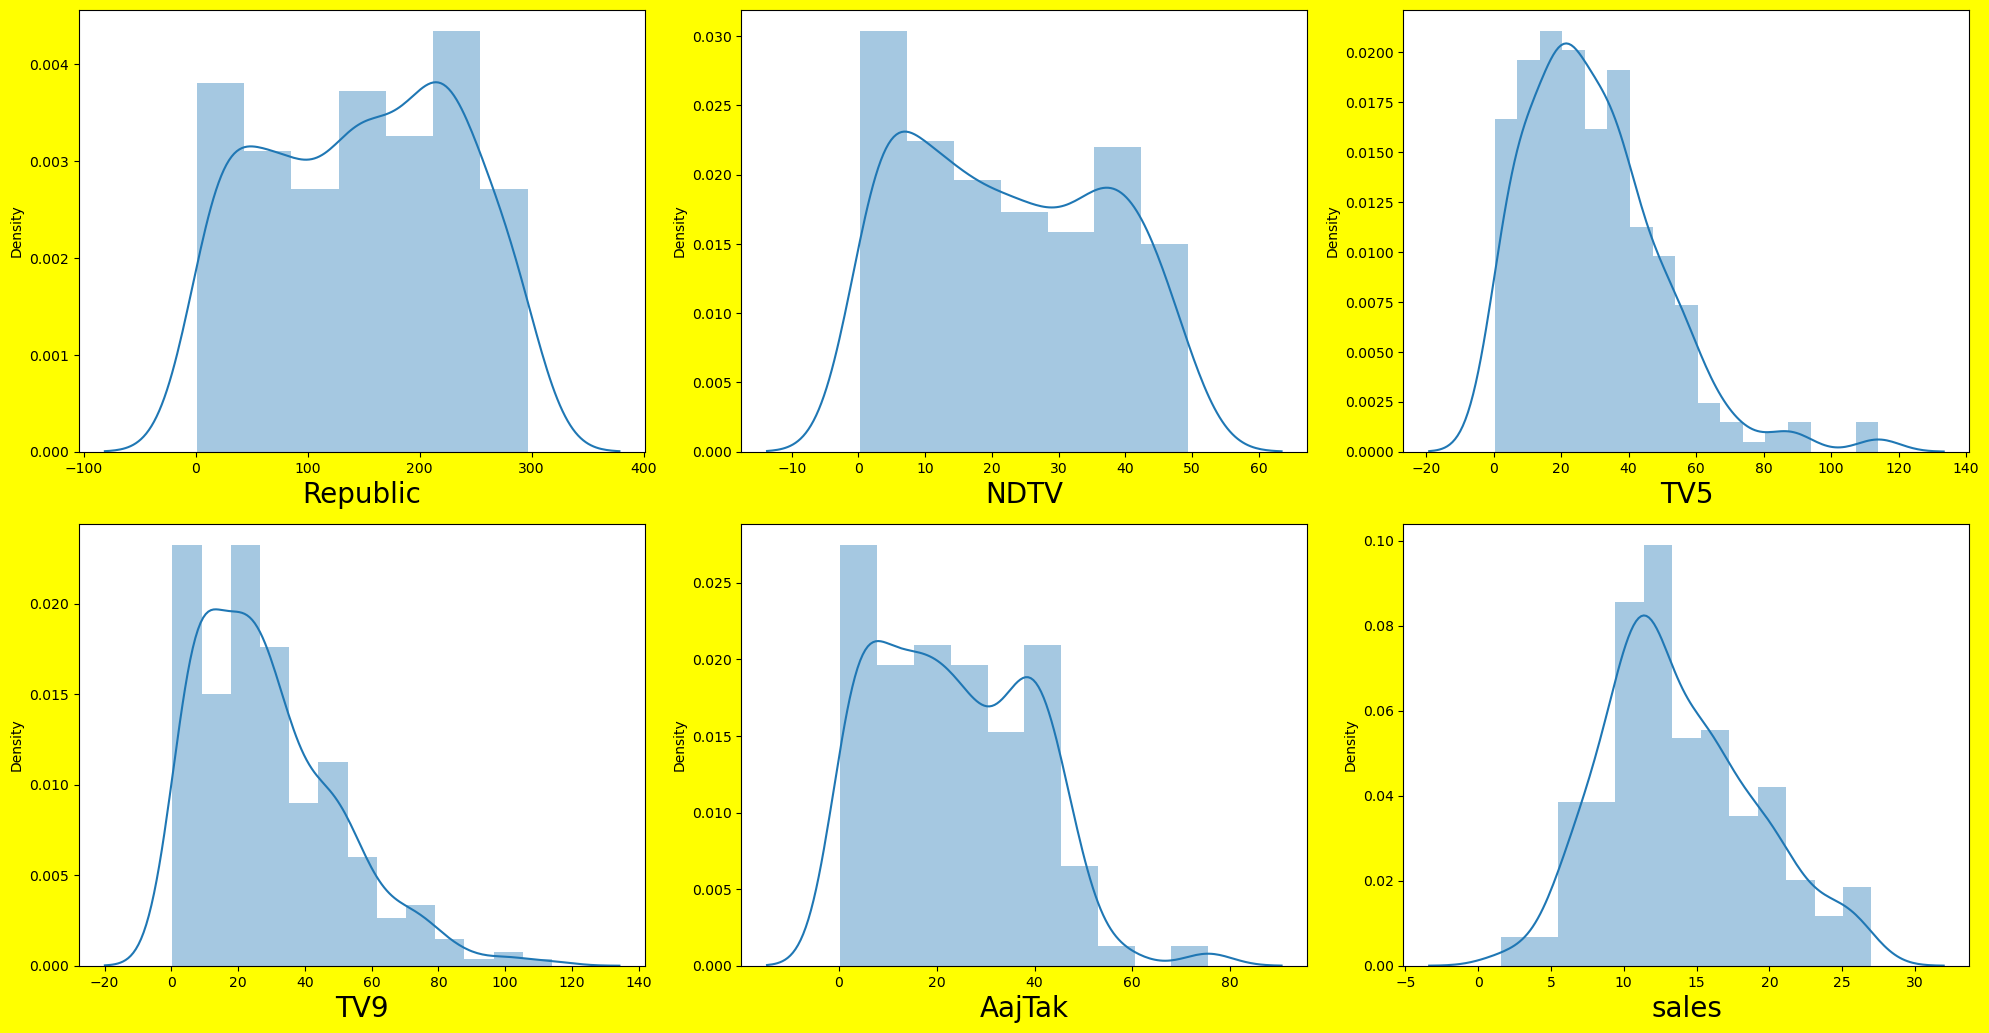

In [20]:
plt.figure(figsize=(20,15),facecolor ="yellow")
plotnumber = 1

for column in data:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    
    

In [21]:
y = data["sales"]
x = data.drop(columns = ["sales"])

In [22]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


In [23]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

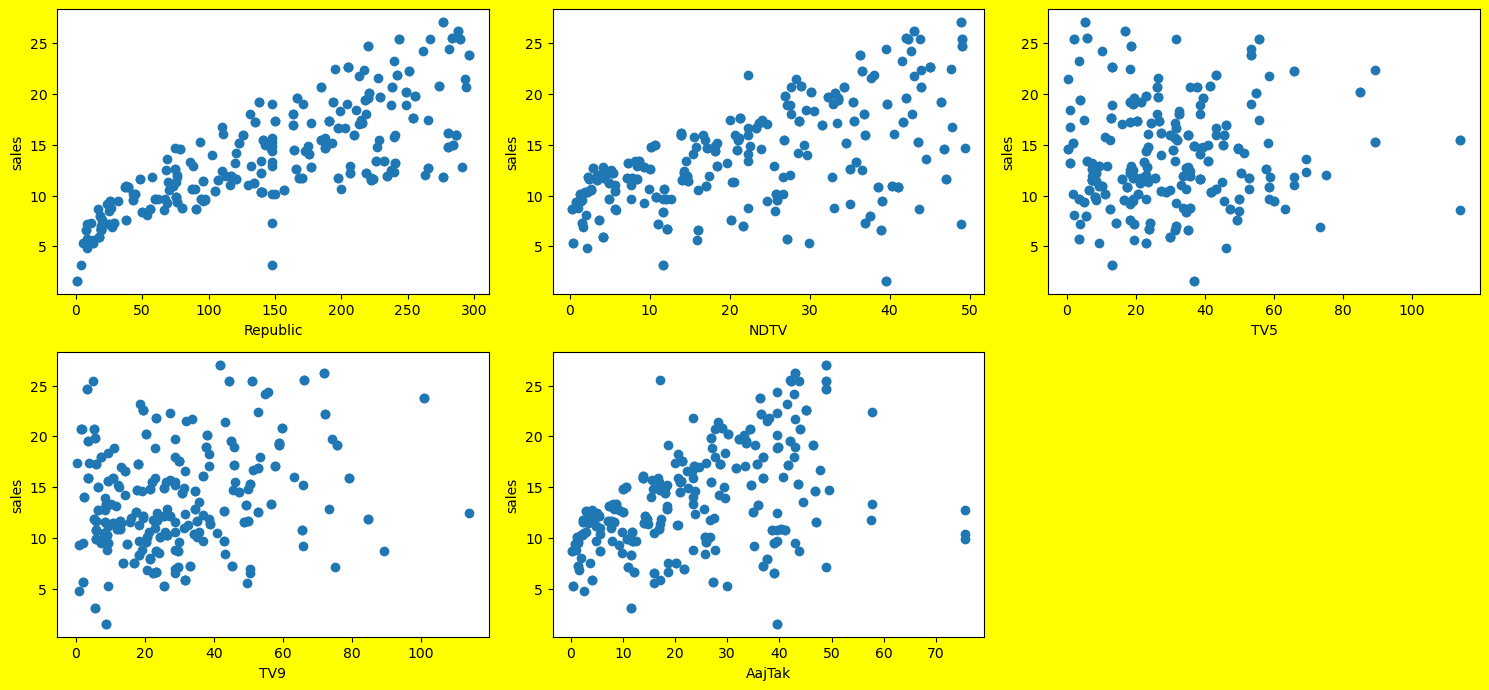

In [25]:
plt.figure(figsize=(15,10),facecolor ="yellow")
plotnumber = 1

for column in x:
    if plotnumber<=5:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("sales",fontsize=10)
    plotnumber+=1
plt.tight_layout()    
    

In [26]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [28]:
x_scaled[0]

array([-1.62625562,  1.81463603, -1.25683363,  2.18734018,  1.62336179])

In [29]:
x_scaled

array([[-1.62625562,  1.81463603, -1.25683363,  2.18734018,  1.62336179],
       [-1.05709897,  0.71459436,  1.79894035, -0.25423831,  2.16486391],
       [-0.32582597, -0.18730316, -1.09886147, -0.81840887, -0.31967525],
       ...,
       [-1.2670338 ,  1.28169659, -0.58545195, -1.09338276,  1.01815353],
       [-0.84716414, -0.78856818, -1.04455854, -1.0839009 ,  3.3115743 ],
       [-1.52711973, -1.24634949,  0.02669017,  0.12977695, -0.40249322]])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=336)
y_train.head()

1      11.8
12     24.4
268     7.6
79     22.2
193    15.5
Name: sales, dtype: float64

In [31]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
data.tail(1)

,Republic,NDTV,TV5,TV9,AajTak,sales
304,17.2,4.1,30.0,31.6,17.2,5.9


In [35]:
print("sales is : ",regression.predict(scaler.transform([[17.2,4.1,30.0,31.6,17.2]])))

sales is :  [4.90926902]


In [36]:
pickle.dump(regression,open("linerreg_model","wb"))

In [37]:
loaded_model = pickle.load(open("linerreg_model","rb"))

a =loaded_model.predict(scaler.transform([[17.2,4.1,30.0,31.6,17.2]]))

In [38]:
a

array([4.90926902])

In [39]:
#adjusted R2 score

regression.score(x_train,y_train)

0.8878970692613806

In [40]:
#adjusted R2 score

regression.score(x_test,y_test)

0.8351196719103282

In [41]:
x_test[1]

array([-0.37481077, -1.00037744,  0.17478907, -0.27320203, -1.00770148])

In [42]:
y_pred = regression.predict(x_test)

In [43]:
y_pred

array([ 3.86675537,  9.59125861, 14.6719803 , 16.88233183, 20.44546031,
       16.75885604, 10.82919992, 13.64696859, 14.26082775, 12.99347801,
        9.57116338, 11.95436978,  9.93714134, 13.47110366, 13.76747989,
        8.28084181, 11.8750297 , 16.38999314,  5.3573878 ,  9.72978443,
       11.68662782, 12.94105689,  3.72479047, 13.55447594, 12.2482764 ,
        5.68871611, 23.83793291, 21.16349852,  5.381829  ,  9.4848272 ,
       18.17665668, 14.64472501, 19.30461904, 19.0716133 , 10.23952206,
       19.76391169, 19.03525744, 18.52537602, 16.93255353, 14.26082775,
       13.26004062, 19.37960098, 15.70702934, 22.89948683, 10.60902404,
       14.37473195,  5.6809762 , 19.19725513,  9.81023718, 12.49432029,
       21.81365054, 24.32145307,  6.4419233 , 19.83889115, 15.2788198 ,
        7.53638974, 10.92185085, 11.59370076, 17.86757139,  8.35984468,
       23.80517487, 13.10053411, 12.70217765, 15.2788198 , 16.51619961,
        8.45249273, 17.4180735 , 15.21143147, 24.32145307,  7.00

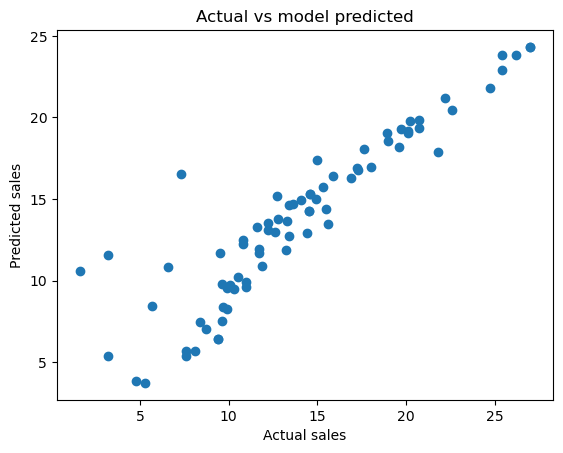

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs model predicted")
plt.show()

# Model Evaluation

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
lasscv = LassoCV(alphas = None,max_iter = 10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [57]:
alpha = lasscv.alpha_
alpha

0.08933962333248054

In [58]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.08933962333248054)

In [59]:
lasso_reg.score(x_test,y_test)

0.8327755708336791

# Using Ridge regression Model

In [61]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [62]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [63]:
ridgecv.alpha_

0.09099999999999998

In [64]:
ridge_model =Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [65]:
ridge_model.score(x_test,y_test)

0.835105449382315